1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson
from math import sqrt, pi, erf
from scipy import stats
from scipy import optimize

probability that in a single year are observed 15 or more hurricances is: 0.0013726297097147906


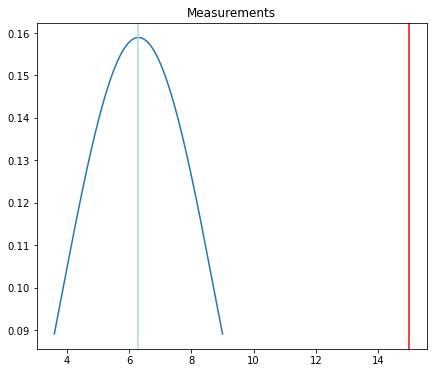

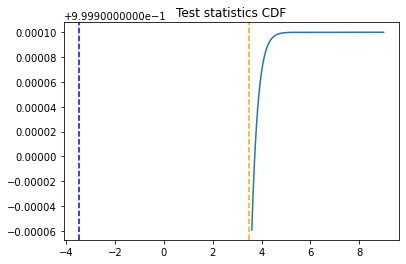

In [76]:
#given parameters
x0 = 15
mu = 6.3
sigma=np.sqrt(mu)
Z=abs(x0-mu)/sigma
# Poisson
pmf = poisson.pmf(x0, mu)
print("probability that in a single year are observed 15 or more hurricances is:",pmf)
# plotting the statistices and its pdf
x=np.linspace(0,200,10)
y=stats.norm.pdf(x, loc=mu, scale=sigma)
# plot the measurement and its assumed pdf
w = mu - 15
x = np.linspace(mu - w - 6, w + mu + 6, 1000)
y = stats.norm.pdf(x, loc=mu, scale=sigma)
plt.figure(figsize=(7,6))
plt.plot(x, y)
plt.axvline(x0, color='red')
plt.axvline(mu,  color='lightblue')
plt.title("Measurements")
plt.show()
# calculating p-value
# plot the Gaussian Comulative Distribution Function
cs = stats.norm.cdf(x)
plt.plot(x, cs)
plt.axvline(Z, linestyle='--', color='orange')
plt.axvline(-Z, linestyle='--', color='blue')
plt.title("Test statistics CDF")
plt.show()

In [77]:
# calculate the p-value as the sum of the left tail + the right tail
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
# note that you can surely perform an integral of stats.norm.pdf, but using the cdf is much more convenient
print("p-value =", pvalue)
print("Since p-value is less than 𝛼(0.05) , we shall reject the null hypothesis.")
print("This number is significantly different.")

p-value = 0.0005279431738299246
Since p-value is less than 𝛼(0.05) , we shall reject the null hypothesis.
This number is significantly different.


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [78]:
#given samples
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
#calculating mean
sigma_pre = np.sqrt(np.var(pre, ddof=1))
sigma_post =np.sqrt(np.var(post, ddof=1))
sigma=np.sqrt(((sigma_pre)*2+(sigma_post)*2)/2)
n=len(post) #since both have the same length
# calculating mean
pre_mean = np.mean(pre)
post_mean = np.mean(post)
# calculating the test statistics
T = (pre_mean - post_mean) / (sigma * np.sqrt(2/n))
print("The test statistics =", T)
# p-value
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)
print("Since p-value is greater than 𝛼(0.05) , our model represents the data. ")

The test statistics = -8.94370967873925
p-value = 8.987454115653134e-06
Since p-value is greater than 𝛼(0.05) , our model represents the data. 


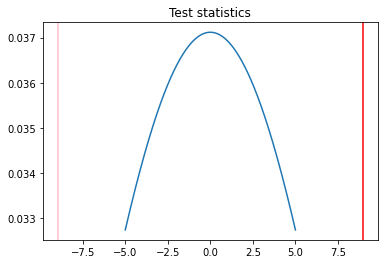

In [79]:
# plotting the test statistics
x = np.linspace(-5, +5, 1000)
y = stats.t.pdf(x,scale=sigma / np.sqrt(2/n), df= n - 1)
plt.plot(x, y)
plt.fill_between(x, y, where=np.abs(x) > np.abs(T), color='lightblue')
plt.axvline(T,color='pink')
plt.axvline(-T,color='red')
plt.title("Test statistics")
plt.show()

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

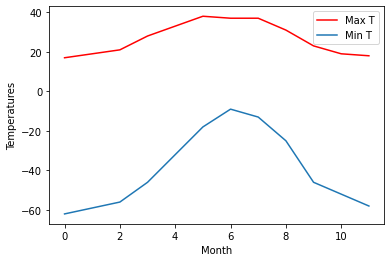

parameters for max:
 [ 27.62925851 -10.63955647  -0.22590564]
parameters for min:
 [-37.71075225 -25.20712454  -0.65355893]
covariance matrix for max:
 [[ 0.09004798 -0.01373836  0.00029334]
 [-0.01373836  0.1667012   0.00058179]
 [ 0.00029334  0.00058179  0.00523888]]
covariance matrix for min:
 [[ 0.96601538 -0.13838164  0.00376442]
 [-0.13838164  1.82294746  0.00701028]
 [ 0.00376442  0.00701028  0.00984569]]


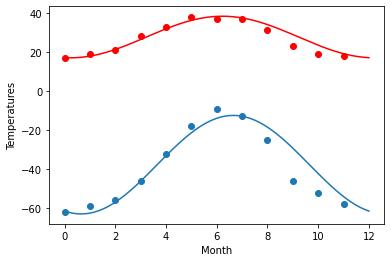

In [80]:
# given data
max_data = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
min_data = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months=np.arange(12)
#plotting the data
plt.figure(figsize=(6, 4))
plt.plot(months,max_data,color="red",label="Max T")
plt.plot(months,min_data,label="Min T")
plt.xlabel("Month")
plt.ylabel("Temperatures")
plt.legend()
plt.show()

# as we can see from the plotted data this very straightforward.
# it looks like a sampled periodic function
# so,i am using a periodic function to best fit the data

def temp_f(times, avg, ampl, time_offset):
    #print(" Time Offset :",time_offset)
    return (avg+ ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

output_max, cov_max = optimize.curve_fit(temp_f, months,max_data,  [0, 40, 2])
output_min, cov_min = optimize.curve_fit(temp_f, months, min_data, [-5,-65, 2])
print("parameters for max:\n", output_max)
print("parameters for min:\n", output_min)
print("covariance matrix for max:\n", cov_max)
print("covariance matrix for min:\n", cov_min)

#plotting the fit over the data
year = np.linspace(0,12,365) #since the data is given over  a period of 365 days
plt.figure()
plt.scatter(months, max_data,color="red")
plt.plot(year, temp_f(year, output_max[0],output_max[1],output_max[2]), 'r-')
plt.scatter(months, min_data)
plt.plot(year, temp_f(year, output_min[0],output_min[1],output_min[2]), '-')
plt.xlabel("Month")
plt.ylabel("Temperatures")
plt.show()

The fit is reasonable as can be seen from the plot. The fit is very reasonable and fits the plot until the 7th month. after that month the fit does not work.

also, we can see fro the printed offsets that , the offset min and max are the not same within the fit accuracy.

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

entries: [3.300e+01 5.200e+01 1.000e+02 2.740e+02 6.826e+03 3.664e+03 3.000e+01
 1.000e+00 1.000e+00 1.000e+00]


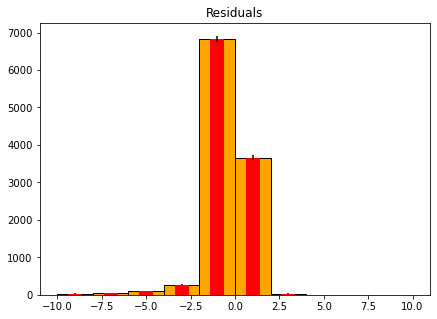

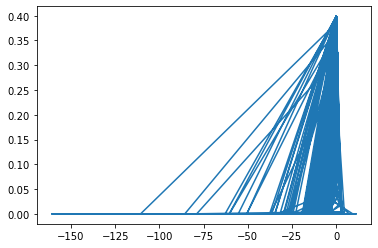

In [81]:
residuals_261 = np.load('data/residuals_261.pkl',allow_pickle=True)
df=pd.DataFrame(residuals_261.item())
df
# considering only the residual feature 
# creating a histogram with binning
plt.figure(figsize=(7, 5))
entries, edges, plots = plt.hist(df['residuals'], color='orange', edgecolor='black', bins=10,range =(-10,10))
print("entries:",entries)
plt.title('Residuals')
#setting an appropriate poisson uncertainity for each bin
#given values and parameters
std=np.sqrt(np.abs(entries))
bincenters=0.5*(edges[1:] + edges[:-1])
plt.bar(bincenters, entries,color='r',yerr=std)
plt.show()
# as the gaussian
y_data = stats.norm.pdf(df['residuals'], 0, 1)
plt.plot(df['residuals'], y_data)

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [82]:
!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/

--2023-01-17 16:58:16--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [following]
--2023-01-17 16:58:16--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1d08051122ce80d8bf1614adc8.dl.dropboxusercontent.com/cd/0/inline/B0tcmoVaOtuMwR9CNL9wLXMnib9x-veCnS4AHp-O6PBAxJ8B5JbOZCnjjjmuX0MK2__M0wOXc-Nwh-KB0LwX_AFSWdOjbjZsBxRsG7smf2zCDk3StOcBVfZZAliJRjx5s9nH-WWwXnmggLDsSOD9QEIEJeubk9LPkyhxiY2yGa7S_Q/file# [following]
--2023-01-17 16:58:17--  https://uc1d08051122ce80d8bf1614adc8.dl.dropboxuserco

The best fit values of teh parameters are : [-9.95518358 12.31340591  9.04084545]
overall average temperature in Munich : 8.933222104668378 Degrees
coldest temperature recorded: -16.7778
Hottest temperature recorded: 27.6667
 Daily average values for the coldest time of the year : -0.5975112711102302  Degrees


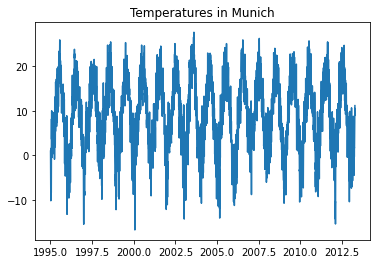

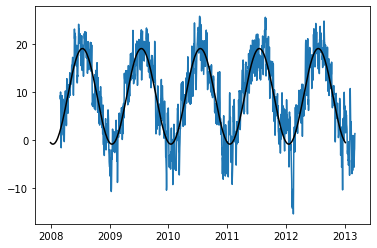

In [83]:
import numpy as np
# loading the text file
date, temperature = np.loadtxt('data/munich_temperatures_average_with_bad_data.txt', unpack=True)
# we have a huge amount of data.
# removing the bad values from the data
retain = np.abs(temperature) < 90
date = date[retain]
temperature = temperature[retain]
plt.plot(date,temperature)
plt.title("Temperatures in Munich")
#defining the function 
def func(t, a, b, c):
        return a * np.cos(2 * np.pi * t + b) + c
# using curve fit and plotting the data   
res, cov = optimize.curve_fit(func, date, temperature)
plt.figure()
# 2008 data begins on 4749th row and 2012 data begins on 6574th row
plt.plot(date[4749:6574], temperature[4749:6574]) 
years = np.linspace(2008, 2013, 365)
plt.plot(years, func(years, *res), color='black')
# What are the best-fit values of the parameters?
print("The best fit values of teh parameters are :", res)
# the overall average temperature in Munich
print("overall average temperature in Munich :",np.mean(temperature),"Degrees")
# daily average values predicted by the model for the coldest and hottest time of year
print("coldest temperature recorded:",min(temperature))
print("Hottest temperature recorded:",max(temperature))
# Typical daily average values predicted by the model for the coldest time of year
# coldest average values can be estimated by evaluating the model at t = 0 
coldest_temp = func(0, *res)
print(" Daily average values for the coldest time of the year :",coldest_temp," Degrees")   

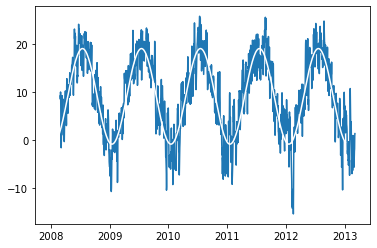

In [84]:
# second function 𝑔(𝑥)
def func_g(t, a, b, c, d):
        return a * np.cos(2 * np.pi *b* t + c) + d
# using curve fit and plotting the data   
res_g, cov_g = optimize.curve_fit(func_g, date, temperature)
plt.figure()
# 2008 data begins on 4749th row and 2012 data begins on 6574th row
plt.plot(date[4749:6574], temperature[4749:6574]) 
years = np.linspace(2008, 2013, 365)
plt.plot(years, func_g(years, *res_g), color='white')

In [85]:
# define a function that performes the F-test 
# RSS is the sqaure sum of the residuals of the fit
RSS_f = np.sum((func(years, *res))*2)
RSS_g = np.sum((func_g(years, *res_g))*2)
p_f=3 # no. of parameters = 3
p_g=4 # no. of parameters = 3
n=len(date) # no. of years
result = ((RSS_g-RSS_f)/(p_g-p_f)) / (RSS_f/(n-(p_f)))
pval = 1. - stats.f.cdf(result, p_g - p_f, n - p_g)

print("p-value =", pval)
print("Since p-value is less than 𝛼(0.05) , we shall reject the null hypothesis.")
print("Additional parameters improve the fit.")

p-value = 0.32792655116082714
Since p-value is less than 𝛼(0.05) , we shall reject the null hypothesis.
Additional parameters improve the fit.
